# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [77]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'StudentID': [i+1 for i in range(10)],'Age': x_values, 'Tardies': y_values})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

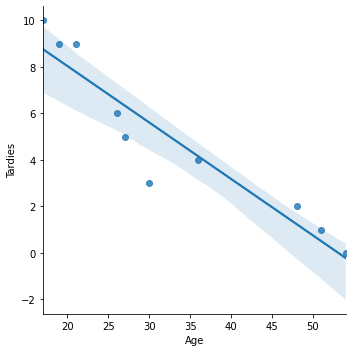

In [78]:
# Your code here.
sns.lmplot(data=student_data, x='Age',y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [79]:
# Your response here. 
"""Yes, there's a downhill trend - the older the student, the lower the number of tardies they have.
Potentially, we can assess a hypothesis that a relation between the two variables exists."""

"Yes, there's a downhill trend - the older the student, the lower the number of tardies they have.\nPotentially, we can assess a hypothesis that a relation between the two variables exists."

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [80]:
# Your response here.
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f'Covariance: {covariance}')
correl = student_data['Age'].corr(student_data['Tardies'])
print(f'Correlation: {correl}')
"""Covariance shows how much two variables vary in the same (or opposite) direction. Correlation shows how strong this relationship of variance is.
The correlation between the two variables seems to be high and negative, as we suspected by observing the chart."""

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


'Covariance shows how much two variables vary in the same (or opposite) direction. Correlation shows how strong this relationship of variance is.\nThe correlation between the two variables seems to be high and negative, as we suspected by observing the chart.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [81]:
# Your response here.
X = student_data['Age']
Y = student_data['Tardies']
X = sm.add_constant(X)
reg_model = sm.OLS(Y,X)
results = reg_model.fit()
results.summary()

/Users/daniel.quer/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           5.57e-05
Time:                        16:25:32   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
print("Outcome variable is Tardies. We are using linear regression.")

Outcome variable is Tardies. We are using linear regression.


Plot your regression model on your scatter plot.

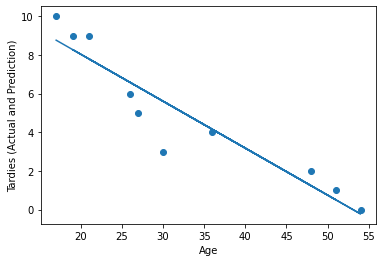

In [85]:
# Your code here.
Y_pred = results.predict()
plt.plot(student_data['Age'], Y_pred)
plt.scatter(x = student_data['Age'], y = student_data['Tardies'])
plt.xlabel("Age")
plt.ylabel("Tardies (Actual and Prediction)")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

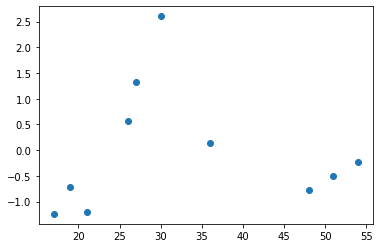

In [29]:
# Your response here.
residuals = Y_pred - Y
plt.scatter(x = student_data['Age'], y = residuals)
plt.show()

In [30]:
print("The model fits well to the actual population. There is a powerful goodness of fit and coefficients are estimated with a degree of confidence lower than 1%.")

The model fits well to the actual population. There is a powerful goodness of fit and coefficients are estimated with a degree of confidence lower than 1%.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [32]:
# Import any libraries you may need & the data
vhs = pd.read_csv('vehicles.csv')
vhs.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:
vhs[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


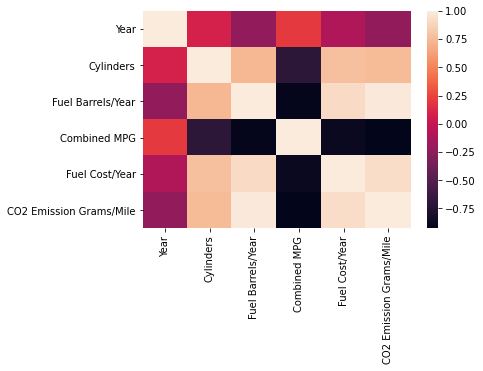

In [35]:
# Your response here. 
sns.heatmap(vhs[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr())

In [51]:
print("The most important variable in determining CO2 emissions is going to be Fuel Barrels/Year. \nThe least one is Year, followed by Cylinders.")

The most important variable in determining CO2 emissions is going to be Fuel Barrels/Year. 
The least one is Year, followed by Cylinders.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [62]:
# Your response here. 

X = vhs[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
Y = vhs['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
vhsresults = sm.OLS(Y,X).fit()
vhsresults.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 07 Nov 2020   Prob (F-statistic):               0.00
Time:                             16:14:37   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [63]:
# Your response here.
print("The most important variable in the model is Fuel Barrels / Year. Its t value is the largest - and if we ran a Simple Regression Analysis between CO2 Emission Grams / Mile and Fuel Barrels / Year, the goodness of fit doesn't change substantially - R2 only decreases to 0.97")

The most important variable in the model is Fuel Barrels / Year. Its t value is the largest - and if we ran a Simple Regression Analysis between CO2 Emission Grams / Mile and Fuel Barrels / Year, the goodness of fit doesn't change substantially - R2 only decreases to 0.97


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [87]:
# Your code here. 
df = pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

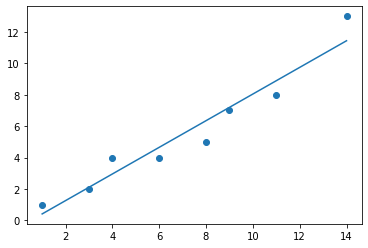

In [94]:
X = df['X']
Y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
Y_pred = model.predict()
plt.scatter(df['X'],Y)
plt.plot(df['X'],Y_pred)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [96]:
# Your response here. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000102
Time:                        16:31:07   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
print('Yes, to a large degree of confidence we can ascertain there is a positive relationship between the variables. Large R-squared (0.93) as well as low P value for the beta_1 coefficient.')

Yes, to a large degree of confidence we can ascertain there is a positive relationship between the variables. Large R-squared (0.93) as well as low P value for the beta_1 coefficient.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

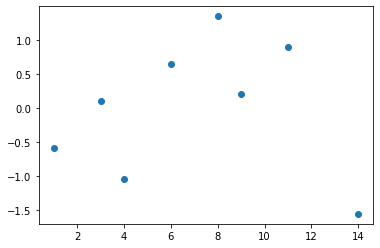

In [101]:
# Your response here. 
residuals = Y_pred - Y
plt.scatter(df['X'],residuals)

In [102]:
df2 = df[df['X'] != 14]

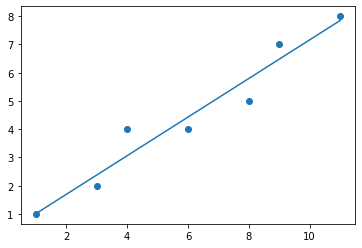

In [104]:
X = df2['X']
Y = df2['Y']
X = sm.add_constant(X)
model2 = sm.OLS(Y,X).fit()
Y_pred = model2.predict()
plt.scatter(df2['X'],Y)
plt.plot(df2['X'],Y_pred)
plt.show()

In [105]:
# Your response here. 
model2.summary()

/Users/daniel.quer/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           0.000264
Time:                        16:36:04   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [106]:
# Your response here. 
print("There's barely no change. I wouldn't mind so much about it.")

There's barely no change. I wouldn't mind so much about it.
